# 1. Load dataset

#### In this assignment, you will use a turbo.az dataset which is a collection of cars (Mercedes C-class). It contains information about 1328 cars with features of (Sheher, Marka, Model, Buraxilish ili, Ban novu, Reng, Muherrikin hecmi, Muherrikin gucu, Yanacaq novu, Yurush, Suretler qutusu, Oturucu, Yeni, Qiymet, Extra Information, Seller’s comment). You will need to read the data from data file (turboaz.csv) and extract only 3 columns for your model:
X1 - Yurush (mileage)<br>
X2 - Buraxilish ili (model year)<br>
Y - Qiymet (price)

In [1]:
import pandas as pd
import copy, math
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("turboaz.csv")
df = df[["Yurush","Buraxilish ili","Qiymet"]]
df.head()


,Yurush,Buraxilish ili,Qiymet
0,366 000 km,1999,12500 AZN
1,102 000 km,2014,31500 $
2,469 700 km,2002,11700 AZN
3,556 680 km,1998,9700 AZN
4,300 000 km,2000,12700 AZN


In [2]:
def to_price(x):
    if x.split(" ")[1] == "AZN":
        return float(x.split(" ")[0])
    elif x.split(" ")[1] == "$":
        return float(x.split(" ")[0])*1.7
    
def yurush_to_float(x):
    return float(x.replace(' ', '').replace('km', ''))

        
df["Qiymet(AZN)"] = df["Qiymet"].apply(lambda x: to_price(x))
df["Yurush"] = df["Yurush"].apply(lambda x: yurush_to_float(x))
df.head()

,Yurush,Buraxilish ili,Qiymet,Qiymet(AZN)
0,366000.0,1999,12500 AZN,12500.0
1,102000.0,2014,31500 $,53550.0
2,469700.0,2002,11700 AZN,11700.0
3,556680.0,1998,9700 AZN,9700.0
4,300000.0,2000,12700 AZN,12700.0


# 2. Visualize

#### Using matplotlib library (scatter, Axes3D), you are expected to provide 3 visualizations of data:
a) Qiymet (Y) vs Yurush (X1)<br>
b) Qiymet (Y) vs Buraxilish ili (X2)<br>
c) 3D plot of all three values (Y, X1, X2)<br>

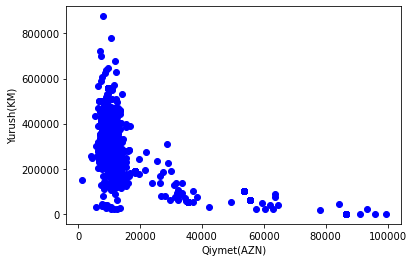

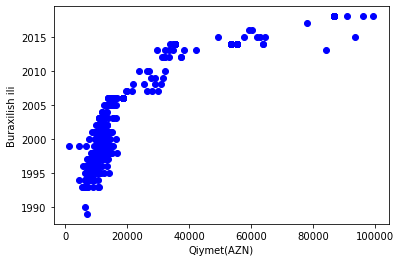

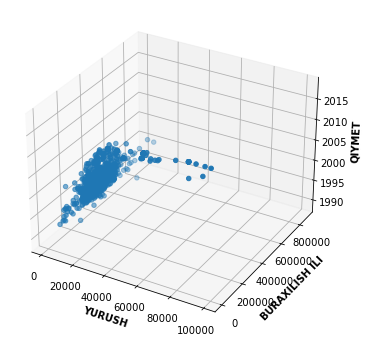

In [3]:
plt.scatter(df["Qiymet(AZN)"], df["Yurush"], c ="blue")
plt.xlabel("Qiymet(AZN)")
plt.ylabel("Yurush(KM)")

plt.show()

plt.scatter(df["Qiymet(AZN)"], df["Buraxilish ili"], c ="blue")
plt.xlabel("Qiymet(AZN)")
plt.ylabel("Buraxilish ili")

plt.show()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(df["Qiymet(AZN)"], df["Yurush"], df["Buraxilish ili"])
ax.set_xlabel('YURUSH', fontweight ='bold')
ax.set_ylabel('BURAXILISH ILI', fontweight ='bold')
ax.set_zlabel('QIYMET', fontweight ='bold')
plt.show()

# 3. Linear Regresa a mi

#### Implement Linear Regression from scratch (using numpy)
a) Calculate cost function. Implement a function which returns cost given true y values, x values and parameters (w).<br>
<div>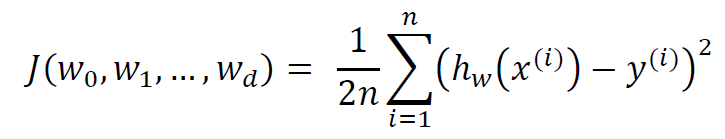</div>

In [38]:
x1 = df["Yurush"]
x2 = df["Buraxilish ili"]
X = df[["Yurush","Buraxilish ili"]]
w_init = np.random.uniform(low=0, high=20, size=(1328,))

y = df["Qiymet(AZN)"]
w1_init = 3
w2_init = 1
b_init = 0

def compute_cost(x1,x2,y,w1,w2,b): 
    # number of training examples
    m = x1.shape[0]

    
    # You need to return this variable correctly
    total_cost = 0
    
    ### START CODE HERE ###  
    pred = w1*x1 + w2*x2 + b
    cost = (pred - y)**2
    total_cost = np.sum(cost)
    total_cost = total_cost / (2*m)
    
    return total_cost


    

In [39]:
print(compute_cost(x1,x2,y,w1_init,w2_init,b_init))

409314332445.97253


b) Normalize data using Z score normalization (Recommended).<br>

In [40]:
df["z_yurush"] = (df["Yurush"]-df["Yurush"].mean()) / df["Yurush"].std()
df["z_buraxilish_ili"] = (df["Buraxilish ili"]-df["Buraxilish ili"].mean()) / df["Buraxilish ili"].std()
df["z_qiymet"] = (df["Qiymet(AZN)"]-df["Qiymet(AZN)"].mean()) / df["Qiymet(AZN)"].std()
x1 = df["z_yurush"]
x2 = df["z_buraxilish_ili"]
X = df[["z_yurush","z_buraxilish_ili"]]
w_init = np.random.uniform(low=0, high=20, size=(2,))

y = df["z_qiymet"]


c) Implement gradient descent algorithm to minimize the cost function.
- Assign initial values of W=(w0, w1, w2) to zero or choose randomly
- Learning rate: alpha=0.001, you can change it in different experiments
- Number of iterations: 10000 or you can stop it when two sequential values are too close.
- Calculate values of parameters using gradient descent formula.
<div>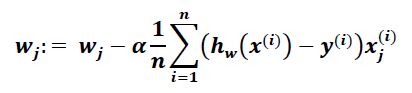</div>

In [42]:

theta = np.random.randn(2,1)


def cal_cost(theta,X,y):
    m=len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions -y))

def gradient_descent(X,y,theta,learning_rate=0.3,iterations=10000):
    m=len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        prediction = np.dot(X,theta)
        
        theta = theta - (1/m)*learning_rate*(X.T.dot(prediction-y))
        theta_history[it,:] = theta.T
        cost_history[it] = cal_cost(theta,X,y)
        
    return theta,cost_history,theta_history

cal_cost(w_init,X,y)
print(gradient_descent(X,y,w_init,learning_rate=0.3,iterations=10000))

(z_yurush           -0.093344
z_buraxilish_ili    0.830867
dtype: float64, array([nan, nan, nan, ..., nan, nan, nan]), array([[10.77828762, 14.38655718],
       [ 9.83779218, 12.18237461],
       [ 8.80223394, 10.47808842],
       ...,
       [-0.09334375,  0.83086746],
       [-0.09334375,  0.83086746],
       [-0.09334375,  0.83086746]]))


In [9]:
# tmp_dj_db, tmp_dj_dw = compute_gradient(X, y, w_init, b_init)
# print(f'dj_db at initial w,b: {tmp_dj_db}')
# print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')
print(X.shape)
print(y.shape)
print(w_init.shape)
print(b_init)

(1328, 2)
(1328,)
(2,)
0


d) Plot graph of Cost function and describe how it changes over iterations.

In [10]:
compute_gradient(X, y, w_init, b_init)

KeyError: 0

e) Plot points of Y (Qiymet) vs X1 (Buraxilish ili) and draw a line of predictions made with parameters you got from gradient descent.

f) Plot points of Y (Qiymet) vs X2 (Yurush) and draw a line of predictions made with parameters you got from gradient descent.

g) Plot 3D graph of points of Y (Qiymet), X1, X2 and predicted Y (Qiymet) using the same X1 and X2. It should look like this (blue points are true values, red points are predicted values):

h) Given are two new cars which are not in the dataset. Predict the prices of these cars by using your parameters and compare your predictions with the actual prices.
- Car 1 {Yurush: 240000, Buraxilish ili: 2000, Qiymet: 11500}
- Car 2 {Yurush: 415558, Buraxilish ili: 1996, Qiymet: 8800}

# 4. Linear Regression using library

#### Use a library to fit perform linear regression on the data. You should use the same features (Yurush and Buraxilish ili) as input to this model and perform the same testing (3(h)) as above (using scikit-learn library is recommended).

In [36]:
b_init = 785.1811367994083
w_init = np.random.uniform(low=0, high=20, size=(1328,))
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

compute_cost(X, y, w_init, b_init)


KeyError: 0